# Assignment 9: Clustering Customers of a Comic Book Store

In this assignment, you will be solving a traditional problem in quantitative marketing: Customer segmentation. Having a properly segmented database is extremely important to define marketing campaigns, as it allows companies to define value-centric actions targeted towards customers of different profiles. While there are several ways we can cluster customers, in this example we will use the [Recency, Frequency and Monetary Value](https://en.wikipedia.org/wiki/RFM_(market_research)), or RFM, paradigm to do so. This way of thinking of customer data reflects the engagement between a customer and a company by reducing their interactions to three values:

- The **Recency** between interactions: The time between two subsequent purchases or between two general interactions between the customer and your organization.

- The **Frequency** of interactions: The raw number of interactions over a predefined time. This can be for example how many times a customer visits your website every month, or how many purchases the customer does at your store, etc.

- The **Monetary Value** of the interactions: The total monetary value (not necessarily positive) of the interactions of the customer with your organization over the same period of time as before.

Additionally, this dataset has a **Cost of Service** variable (which is not included in the MV calculations for this example). It shows how much cost each interaction with the customer brings. This can be useful information as a customer may make purchases of small monetary value, but may spend many hours at the store occupying the service personnel's time. This can mean on average these customers may even end up being a cost to the company! The information comes from a local comic book store, and represents the summary of interactions of the customers with a loyalty card.

In this assignment, we will create a clustering of the customers using these four variables and will create a commercial strategy arising from our results.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA

%matplotlib inline

In [47]:
# Uncomment if working in the cloud
#!gdown https://drive.google.com/uc?id=1VL-LjrjgCtGWkDw914MVLj2sEttlL2Uv

## Task 1: Studying the data [10 pts]

Import the data and present the descriptive statistics of all variables. **Written answer: What can you say about the variables you have? Why should you normalize the data?**. Normalize the data so you can create clusters.

In [48]:
# Read the data
data = pd.read_csv("RFM_Assignment_09.csv")


In [49]:
data.describe()

,Recency,Frequency,MV,CoS
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,30.116293,17.164128,8806.972152,8805.228492
std,17.742131,29.419952,3391.111080,3285.384316
min,-4.942628,-1.237633,760.115629,944.136187
25%,18.221827,3.710640,8065.394231,9957.361435
50%,28.588186,6.030687,10462.416975,10000.463454
75%,35.880252,9.999136,10608.634596,10041.297949
max,67.258701,102.189321,11139.504803,11054.536104


In [50]:
# Normalize (Standard) and apply to the data
scaler = StandardScaler()
df = scaler.fit_transform(data)

**Written answer:**

## Task 2: K-Means Clustering and Silhoutte Analysis [30 pts]

Now we can perform the cluster analysis. The single most important question in cluster analysis is to determine the number of clusters that you should create. Following the labs (or [this tutorial](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)), try between 3 and 8 clusters, using a seed of 10, and plot their silouhette analyses (we will plot the clusters themselves in the next question). **Written answer: What is the optimal number of clusters using the silhouette method?**

In [51]:
# Your answer here.
labelsThree = []
labelsFour = []
labelsFive = []
for n_clusters in range (3, 9):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    silhouette_avg = silhouette_score(df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    if (n_clusters == 3): labelsThree = cluster_labels
    elif (n_clusters == 4): labelsFour = cluster_labels
    elif (n_clusters == 5): labelsFive = cluster_labels


For n_clusters = 3 The average silhouette_score is : 0.7441085737382345
For n_clusters = 4 The average silhouette_score is : 0.7899120450839303
For n_clusters = 5 The average silhouette_score is : 0.7249329012890495
For n_clusters = 6 The average silhouette_score is : 0.6556732220239838
For n_clusters = 7 The average silhouette_score is : 0.6513064350384186
For n_clusters = 8 The average silhouette_score is : 0.6142740011419974


**Written answer:** The optimal number of clusters is 4 if we are using the silhouette method.

## Task 3: Plotting the clusters [20 pts]

Now we will visualize what we just did. For this we will use a common trick in clustering: use a PCA transform to reduce the data to a few variables (two or three) and plot those. Apply a PCA transform to the data using two components and create a scatterplot, differentiating by using colours the clusters from previous answer using a different colour. **Note the clusters still must be calculated over the unrotated data**. Use only your results from using 3, 4 and 5 clusters. **Written answer: How many clusters would you use considering the results of task 2 and these ones?**

In [52]:
# Your code here. Add as many cells as you need!
pca = PCA(n_components=2)
pca.fit(df)
z = pca.transform(df)

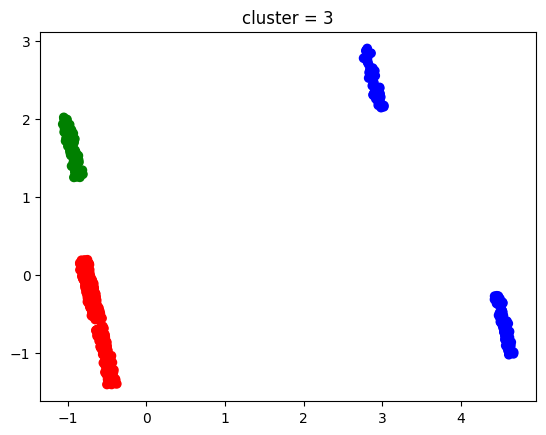

In [53]:
c = []
for label in labelsThree:
    if label == 0: c.append('red')
    elif label == 1: c.append('blue')
    elif label == 2: c.append('green')

plt.title("cluster = 3")
plt.scatter(z[:, 0], z[:, 1], c = c)
plt.show()

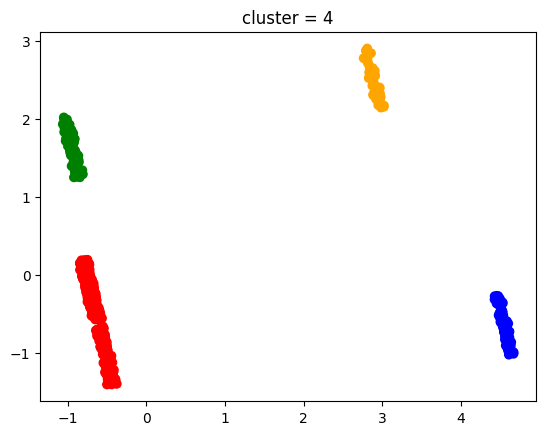

In [54]:
c = []
for label in labelsFour:
    if label == 0: c.append('red')
    elif label == 1: c.append('blue')
    elif label == 2: c.append('green')
    elif label == 3: c.append('orange')

plt.title("cluster = 4")
plt.scatter(z[:, 0], z[:, 1], c = c)
plt.show()

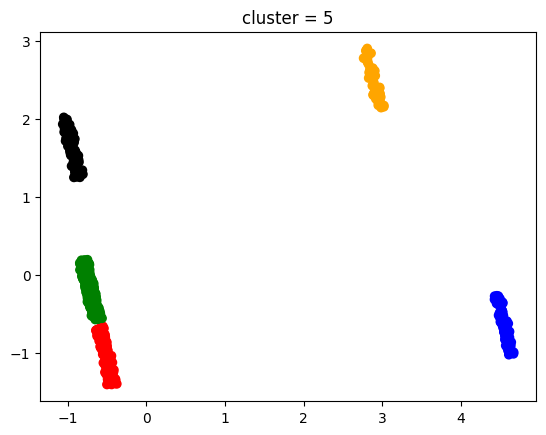

In [55]:
c = []
for label in labelsFive:
    if label == 0: c.append('red')
    elif label == 1: c.append('blue')
    elif label == 2: c.append('green')
    elif label == 3: c.append('orange')
    elif label == 4: c.append('black')

plt.title("cluster = 5")
plt.scatter(z[:, 0], z[:, 1], c = c)
plt.show()

**Written answer:**

I will use cluster = 4 as the result.

## Task 4: Deploying the model. [20 pts]

The objective of any cluster analysis over customer data is to create a reasonable segmentation of your customers. Using the number of clusters you have decided in Task 3 and a table of the averages per variable for each cluster, name the different clusters and think what would a company would do with a customer in that cluster. (*Hint: For example a clusters with high frequency, low recency, and low monetary value are desirable customers for whom it would be a good plan to try to increase their monetary value while keeping their high engagement. You could name them "Diamonds in the rough". [Pandas' `groupby`](https://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average) can probably help.*)

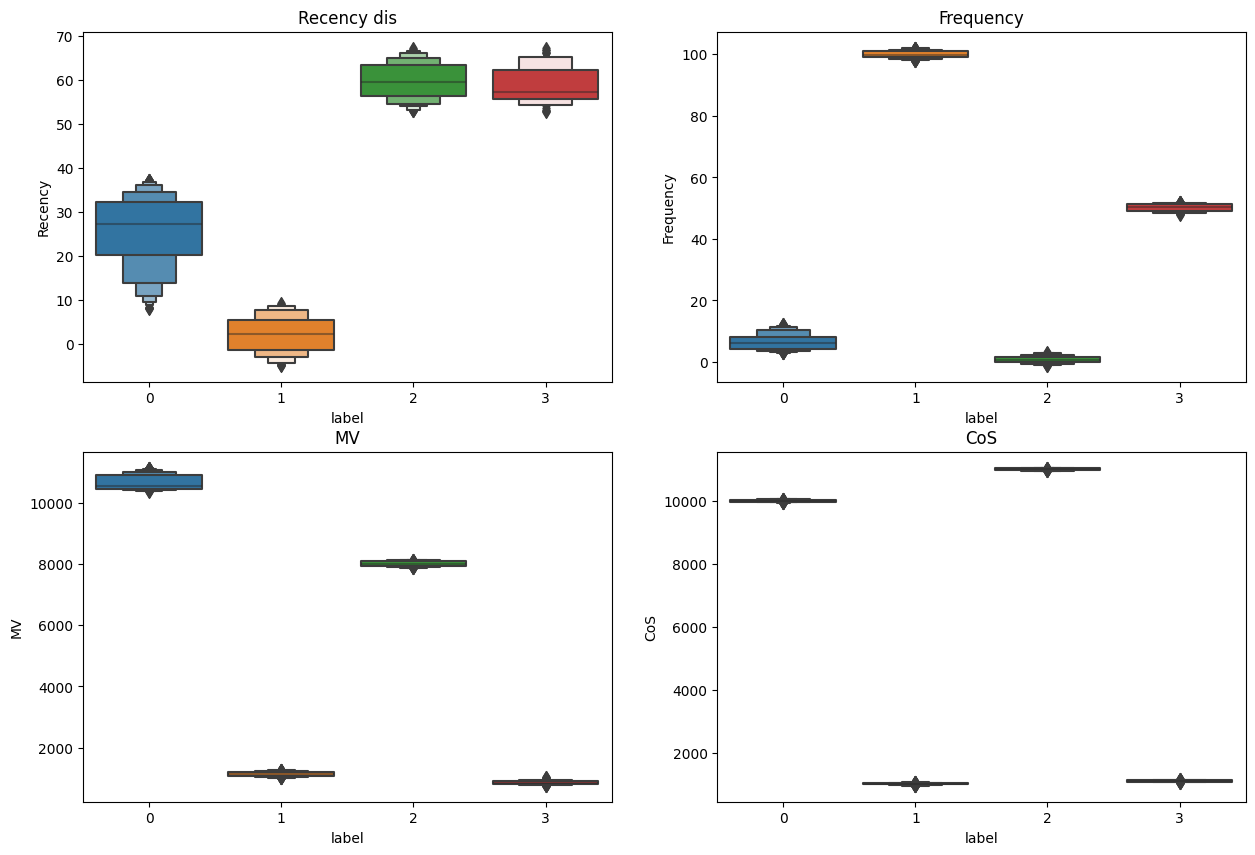

In [83]:
# Your code here.
import seaborn as sns
df2 = data.assign(label=labelsFour)

df_label_0 = df2[df['label'] == 0]
df_label_1 = df2[df['label'] == 1]
df_label_2 = df2[df['label'] == 2]
df_label_3 = df2[df['label'] == 3]
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.boxenplot(ax = axs[0][0], data=df2, x="label", y="Recency")
axs[0][0].set_title("Recency distribution")
sns.boxenplot(ax = axs[0][1], data=df2, x="label", y="Frequency")
axs[0][1].set_title("Frequency distribution")
sns.boxenplot(ax = axs[1][0], data=df2, x="label", y="MV")
axs[1][0].set_title("MV distribution")
sns.boxenplot(ax = axs[1][1], data=df2, x="label", y="CoS")
axs[1][1].set_title("CoS distribution")

plt.show()

In [84]:
df_label_0.describe()

,Recency,Frequency,MV,CoS,label
count,700.000000,700.000000,700.000000,700.000000,700.0
mean,25.701424,6.473078,10638.156654,9999.979644,0.0
std,7.957774,2.585076,240.972598,33.382137,0.0
min,8.052767,2.777994,10360.012241,9944.056083,0.0
25%,20.116087,4.311432,10449.051974,9969.763056,0.0
50%,27.269611,6.030687,10552.181315,10000.463454,0.0
75%,32.130914,8.225224,10889.242888,10030.040537,0.0
max,37.235872,12.205143,11139.504803,10055.771655,0.0


In [85]:
df_label_1.describe()

,Recency,Frequency,MV,CoS,label
count,100.000000,100.000000,100.000000,100.000000,100.0
mean,2.167553,99.947029,1153.133946,1005.710736,1.0
std,4.228345,1.203076,81.544220,32.102917,0.0
min,-4.942628,97.882770,1012.645633,944.136187,1.0
25%,-1.329268,99.023696,1085.175482,986.373996,1.0
50%,2.327978,99.692807,1153.338488,1006.826503,1.0
75%,5.493970,101.017464,1224.531719,1033.566973,1.0
max,9.221921,102.189321,1287.786104,1055.252207,1.0


In [86]:
df_label_2.describe()

,Recency,Frequency,MV,CoS,label
count,150.000000,150.000000,150.000000,150.000000,150.0
mean,59.809092,0.868768,8007.350500,11001.099604,2.0
std,4.104544,1.142074,83.070355,33.091451,0.0
min,52.790746,-1.237633,7860.643360,10944.122763,2.0
25%,56.174893,0.035648,7944.370825,10975.109796,2.0
50%,59.485465,0.802377,8007.687076,10999.460174,2.0
75%,63.315894,1.672611,8082.226819,11030.883409,2.0
max,67.258701,3.189477,8136.960175,11054.536104,2.0


In [87]:
df_label_3.describe()

,Recency,Frequency,MV,CoS,label
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,58.743535,50.159107,876.930495,1090.134542,3.0
std,4.382033,1.318127,75.859663,32.592864,0.0
min,52.753541,47.901820,760.115629,1046.817949,3.0
25%,55.527924,48.957502,814.090007,1062.361274,3.0
50%,57.268206,50.339871,867.849781,1083.452841,3.0
75%,62.160759,51.299551,921.873205,1117.329997,3.0
max,67.219213,52.141234,1039.075886,1155.510954,3.0


**Written answer: (note this answer will be much longer than usual as you need to make an argument for every cluster)**

For cluster 0, 70% of customer are this category, customer has low frequency, medium recency, high MV and COS. I call this group "Dimond", I will try to send email to them to increase the recency and frequency, then try to reduce the COS of these set of customers.

For cluster 1, 10% customers are this category, customer has low recency, MV and COS and has high frequency. I call this group "Sliver", I will try to reduce the COS of these set of customers.

For cluster 2, 15% customers are this category, they have low frequency, medium MV, high recency and COS. I call this group "Gold", I will try to increase the frequency and try to reduce the COS of these set of customers.

For cluster 3, 5% customers are this category, they have low MV, COS, medium frequency and high recency. I call this group "Gem", I will try to introuduce them more of our products to increase MV.